In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [3]:
df1.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df2.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
df1.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
df2.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [7]:
import nltk

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\VIKRAM
[nltk_data]     PATEL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\VIKRAM
[nltk_data]     PATEL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\VIKRAM
[nltk_data]     PATEL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
import nltk, os, re, string
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)


def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df1['text']=df1['text'].apply(remove_stopwords)
df2['text']=df2['text'].apply(remove_stopwords)

In [12]:
df1.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Deeds Reason #earthquake May ALLAH Forgive us,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,residents asked 'shelter place' notified offic...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,got sent photo Ruby #Alaska smoke #wildfires p...,1


In [13]:
df2.head()

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,"Heard #earthquake different cities, stay safe ..."
2,3,NaN,NaN,"forest fire spot pond, geese fleeing across st..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 China Taiwan


In [14]:
import nltk
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords

lemma = WordNetLemmatizer()
def process_text(text):
    text = re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])", " ",text.lower())
    words = nltk.word_tokenize(text)
    words = [lemma.lemmatize(word) for word in words if word not in set(stopwords.words("english"))]
    text = " ".join(words)
        
    return text

df1["text"] = df1["text"].apply(process_text)
df2["text"] = df2["text"].apply(process_text)

In [15]:
import emoji

def cleanTweet(txt):
    txt = re.sub(r'#','',txt)
    txt = re.sub(r'RT : ','',txt)
    txt = re.sub(r'\n','',txt)
    # to remove emojis
    txt = re.sub(emoji.get_emoji_regexp(), r"", txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',txt)
    txt = re.sub(r"https?://\S+|www\.\S+","",txt)
    txt = re.sub(r"<.*?>","",txt)
    return txt  

In [16]:
df1["text"] = df1["text"].apply(cleanTweet)
df2["text"] = df2["text"].apply(cleanTweet)

In [17]:
df1.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquake may allah forgive u,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,resident asked shelter place notified officer ...,1
3,6,NaN,NaN,13 000 people receive wildfire evacuation orde...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfire pour...,1


In [18]:
df1["length"] = df1["text"].apply(len)

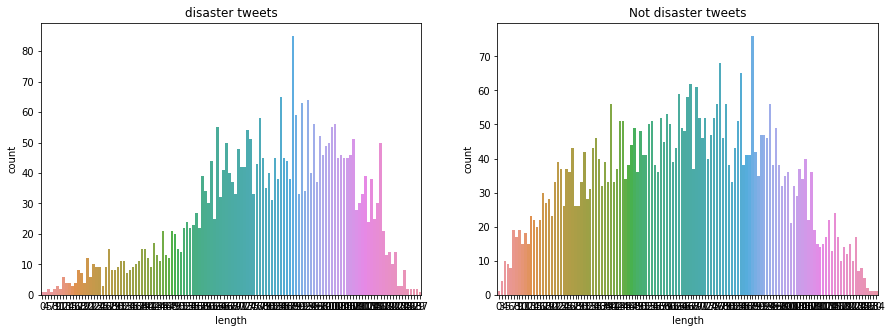

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.countplot(df1[df1["target"] == 1]["length"],ax = ax1).set(title = "disaster tweets")
sns.countplot(df1[df1["target"] == 0]["length"],ax = ax2).set(title = "Not disaster tweets")
plt.show()

In [20]:
train_disaster = df1[df1["target"] == 1]
train_not_disaster  = df1[df1["target"] == 0]


In [21]:
vectorizer = CountVectorizer()

In [22]:
train_disaster_countvectorizer = vectorizer.fit_transform(df1['text'])

In [23]:
train_disaster_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
label = df1['target']
label

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [25]:
df2.head()

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,heard earthquake different city stay safe ever...
2,3,NaN,NaN,forest fire spot pond goose fleeing across str...
3,9,NaN,NaN,apocalypse lighting spokane wildfire
4,11,NaN,NaN,typhoon soudelor kill 28 china taiwan


In [26]:
df2.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [27]:
test_disaster_countvectorizer = vectorizer.transform(df2['text'])

In [28]:
test_disaster_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
from sklearn.svm import SVC

In [30]:
model_svc=SVC(C=100,kernel='rbf')

In [31]:
model_svc.fit(train_disaster_countvectorizer, label)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
test_sample = test_disaster_countvectorizer.toarray()
test_sample

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
test_sample.shape

(3263, 17930)

In [34]:
prediction = model_svc.predict(test_sample)

In [35]:
prediction_df = pd.DataFrame(prediction, columns=['target'])

In [36]:
prediction_df

,target
0,1
1,1
2,1
3,1
4,1
...,...
3258,1
3259,1
3260,1
3261,1


In [37]:
predicted_result = pd.concat([df2['id'], prediction_df], axis=1)
predicted_result

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [38]:
predicted_result.isnull().sum()

id        0
target    0
dtype: int64

In [39]:
predicted_result['target'].value_counts()

0    2084
1    1179
Name: target, dtype: int64

In [40]:
predicted_result.to_csv('predicted_result123.csv', index=False)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_disaster_countvectorizer, label, test_size=0.2)

In [42]:
model_svc.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
predictions_svc = model_svc.predict(x_test)

In [44]:
print(classification_report(y_test, predictions_svc))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       876
           1       0.78      0.72      0.75       647

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [45]:
from sklearn.neighbors import KNeighborsClassifier
model_knc = KNeighborsClassifier()
model_knc.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
predictions_knc = model_knc.predict(x_test)

In [47]:
print(classification_report(y_test, predictions_knc))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79       876
           1       0.82      0.41      0.55       647

    accuracy                           0.71      1523
   macro avg       0.75      0.67      0.67      1523
weighted avg       0.74      0.71      0.69      1523



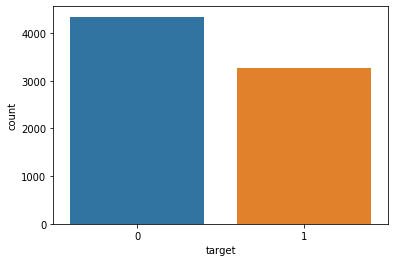

In [48]:
sns.countplot(df1['target'])